<div style="text-align: center; background-color: #e6ffe6; color: #004d00; padding: 20px; border-radius: 10px;">

# 🌾🍃🌾 Rice Leaf Disease Prediction using CNN
                   Urmila kharwa 

</div>

<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">
    
#  Problem Definition
1. Rice is a staple crop and its yield is heavily affected by leaf diseases.

2. Manual identification of rice leaf diseases is time-consuming, subjective, and requires expert knowledge.

3. Farmers and agronomists often lack access to timely and accurate disease diagnosis.

4. There is a need for an automated and reliable system that can detect rice leaf diseases from images.

5. This project aims to build a Convolutional Neural Network (CNN) model to classify rice leaf diseases.

6.  The goal is to enable fast, accurate, and accessible disease detection, promoting precision agriculture and minimizing crop loss.

7. Objective: Predict rice leaf diseases using image-based or tabular data.
8. Output: Classify diseases like Brown Spot, Bacterial Leaf Blight, Leaf Smut, or Healthy.
9. Input: Images of rice leaves or numerical data from sensors (color, humidity, etc.

</div>

<div style="text-align: center; background-color: #fffacd; color: #004080; padding: 20px; border-radius: 10px;">


# 🍃🌾 Domain Knowledge for Leaf Disease

1. Common Leaf Diseases in Crops
The model appears to classify the following diseases:
Brown Spot: Caused by fungal pathogens like Bipolaris oryzae. Symptoms include small brown lesions that spread over time.
Leaf Smut: Caused by Ustilago species, characterized by blackish streaks or smutty patches on leaves.
Bacterial Leaf Blight: Caused by Xanthomonas oryzae, showing as water-soaked lesions that later turn yellow and spread aggressively.

2. Importance in Agriculture
Early detection and classification of diseases help farmers take preventive measures.
Reduces crop yield loss and ensures food security.
Helps in precision agriculture by recommending targeted treatments (fungicides, bactericides).

4. Model Implementation & Techniques
Data Collection: The model is trained on a dataset of diseased leaf images.
Preprocessing: Image enhancement, resizing, and augmentation improve model robustness.
Deep Learning Approach: Likely uses CNNs (Convolutional Neural Networks) for feature extraction and classification.
Evaluation Metrics: Accuracy, confidence scores, precision, recall, and F1-score assess model performance.


6. Potential Challenges & Improvements
Class Imbalance: Some diseases may have fewer samples, affecting model generalization.
Similar Symptoms: Certain diseases look alike, leading to misclassification.
Environmental Factors: Variations in lighting, leaf orientation, and image quality can impact predictions.
Real-world Testing: Field validation is needed to ensure practical usability.


8. Applications
Automated Crop Monitoring: Integrate with drones or smartphones for real-time disease detection.
Smart Farming Systems: AI-powered decision support for farmers.
Agri-Tech Research: Enhancing plant disease databases and agronomic studies.

</div>

We have deviced the project into multiple steps
Importing Libraries
Loading Data
Preparing Dataset
Label Mapping
Data Preproocessing
Model Building
Trining
Check

<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# Step 1: 📚 Importing Libraries

Below are the essential libraries we use to build and evaluate our **Rice Leaf Disease Prediction using CNN**. These tools support data preprocessing,model training, and performance evaluation.

Images are resized, normalized, and augmented (flip, rotate, zoom) to enhance model generalization. The data is then split into training, validation, and test sets for effective learning and evaluation.

</div>

In [244]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

# 📂   Step 2: Load & Preprocess Data

In this step, we load and inspect Images to understand its structure, features, and initial patterns. This forms the foundation for all subsequent analysis.
</div>

In [247]:
IMAGE_SIZE = 256     # Resize images to 256x256
CHANNELS = 3     # Defines the number of color channels in the image.
EPOCHS = 50    # Defines the number of times the entire dataset is passed through the model during training.   but can lead to overfitting if too high


In [249]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # Generates variations of images (rotation, flipping, zooming) to reduce overfitting.


In [251]:
train_datagen = ImageDataGenerator(
        rescale=1./255,       # Normalizes pixel values (0-1) instead of (0-255)
        rotation_range=10,    # Rotates images randomly by ±10 degrees Helps model generalize better by seeing different angles of objects.
        horizontal_flip=True  # Randomly flips images horizontally
)


"C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf"

In [254]:
import os   #  converts the given relative dataset_path into an absolute path using os.path.abspath()

dataset_path = r"C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf"
absolute_path = os.path.abspath(dataset_path)
print("Absolute Path:", absolute_path)


Absolute Path: C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf


In [256]:
import os  #  checks if the specified train_dir exists using os.path.exists() and prints True if the path is valid, otherwise False. 

train_dir = r"C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf"
print("Training Directory Exists:", os.path.exists(train_dir))  # Should print True if the path is correct


Training Directory Exists: True


<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

## 📂   Step 3: Label mapping 
In this step, numerical labels are assigned to categorical classes (e.g., { "Healthy": 0, "Diseased": 1 }) so that the model can process and learn from categorical data, as most machine learning algorithms work with numerical inputs only."
                                                                                                           
</div>

In [260]:
train_generator = train_datagen.flow_from_directory(
        r"C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf",
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

#loads images from a directory, resizes them to (IMAGE_SIZE, IMAGE_SIZE), processes them in batches of 32, and assigns numerical labels
# (class_mode="sparse", meaning labels are integers instead of one-hot encoded vector

Found 119 images belonging to 3 classes.


In [262]:
train_generator.class_indices     # returns a dictionary mapping class names to their assigned numerical labels.

{'Bacterial leaf blight-20200814T055237Z-001': 0,
 'Brown spot-20200814T055208Z-001': 1,
 'Leaf smut-20200814T055530Z-001': 2}

In [265]:
class_names = list(train_generator.class_indices.keys())
class_names

# This code extracts class names from train_generator.class_indices and stores them as a list in class_names

['Bacterial leaf blight-20200814T055237Z-001',
 'Brown spot-20200814T055208Z-001',
 'Leaf smut-20200814T055530Z-001']

In [268]:
# getting 1st image from batch # retrieves the first image from the first batch in train_generator to inspect or process it.
# To verify that images are correctly loaded and preprocessed.
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.9154683  0.85969496 0.84793025]
  [0.9165486  0.8602351  0.8484704 ]
  [0.917629   0.8607753  0.8490106 ]
  ...
  [0.9273825  0.8842453  0.868559  ]
  [0.9324246  0.88928735 0.8754186 ]
  [0.9259263  0.8827891  0.87494594]]

 [[0.922764   0.8769005  0.85609734]
  [0.9211435  0.8736595  0.8544768 ]
  [0.919523   0.8704184  0.85285634]
  ...
  [0.92846286 0.8853256  0.86963934]
  [0.93188447 0.8887472  0.8759588 ]
  [0.92376566 0.8806284  0.8727853 ]]

 [[0.92549026 0.882353   0.86477447]
  [0.92549026 0.882353   0.86369413]
  [0.92549026 0.882353   0.86261374]
  ...
  [0.9295432  0.88640594 0.8707197 ]
  [0.93134433 0.888207   0.87649894]
  [0.92160493 0.8784677  0.87062454]]

 ...

 [[0.91571355 0.8706427  0.84120375]
  [0.9196362  0.87462306 0.84126145]
  [0.92901766 0.8780373  0.8466647 ]
  ...
  [0.9195422  0.8567971  0.8058167 ]
  [0.92008233 0.85733724 0.80635685]
  [0.9206226  0.8578775  0.8068971 ]]

 [[0.9173341  0.8738838  0.8428243 ]
  [0.91909605 0.8724624  0.839641  ]


<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

###   Step 4: Data Preprocessing 🖼️  ➡️  📏  ➡️  🎨  ➡️  🔢  Image Resize Normalize One-Hot Encode

In CNN, data preprocessing involves resizing images, normalizing pixel values, and converting labels to categorical format.

</div>

In [271]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)


In [275]:
validation_generator = validation_datagen.flow_from_directory(
        r"C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 119 images belonging to 3 classes.


In [278]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        r"C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 119 images belonging to 3 classes.


In [281]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.9294118  0.8862746  0.86274517]
  [0.9294118  0.8862746  0.86274517]
  [0.9294118  0.8862746  0.86274517]
  ...
  [0.9254265  0.87384564 0.859424  ]
  [0.92292494 0.86477953 0.8530148 ]
  [0.9247982  0.8692042  0.86389863]]

 [[0.93008995 0.8869527  0.8634233 ]
  [0.9297601  0.88662285 0.86309344]
  [0.92943025 0.886293   0.8627636 ]
  ...
  [0.9274056  0.8741755  0.8610733 ]
  [0.9222652  0.8637899  0.8520252 ]
  [0.9251281  0.8698639  0.8652181 ]]

 [[0.93466187 0.89019614 0.86666673]
  [0.93400216 0.89019614 0.86666673]
  [0.9333424  0.89019614 0.86666673]
  ...
  [0.92938477 0.87450534 0.86272264]
  [0.92160547 0.86280036 0.85103565]
  [0.92545795 0.87052363 0.8665375 ]]

 ...

 [[0.9293795  0.87846375 0.85493433]
  [0.9255087  0.8823714  0.858842  ]
  [0.92940736 0.8862746  0.86273164]
  ...
  [0.9215642  0.8705928  0.84706336]
  [0.9212343  0.8709227  0.8473933 ]
  [0.92090446 0.8712525  0.84772307]]

 [[0.9290497  0.87879354 0.8552641 ]
  [0.92583853 0.8827013  0.85917187]


<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">
    
### Step 5: Build CNN Model – 🧠📦➕🔄🔽🔢 (Add convolution, activation, pooling, flatten, and dense layers to build the CNN architecture).

</div>

In [285]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes, so softmax
])

In [287]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">
    
### Step 6: Compile the Model – Use adam optimizer, SparseCategoricalCrossentropy as loss, and track accuracy as the evaluation metric.
⚙️➕📉📊 = (optimizer + loss + metric setup)

</div>

In [291]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [293]:
119/16

7.4375

In [295]:
80/16

5.0

In [297]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)), 
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax')  # 3 classes → softmax
])

In [299]:
# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 🔹 Step 4: Train the Model


<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

## Step 7: Train the Model 

Fit the model on training data using specified epochs and batch size to learn patterns.
🧠📚🔁 = (model + data + iterations)
</div>

In [303]:
print(train_generator.class_indices)


{'Bacterial leaf blight-20200814T055237Z-001': 0, 'Brown spot-20200814T055208Z-001': 1, 'Leaf smut-20200814T055530Z-001': 2}


In [305]:
# Train Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.3713 - loss: 4.4594 - val_accuracy: 0.3361 - val_loss: 1.2562
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.3774 - loss: 1.1842 - val_accuracy: 0.3866 - val_loss: 1.1188
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.4175 - loss: 1.0861 - val_accuracy: 0.3361 - val_loss: 1.0729
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.4173 - loss: 1.0698 - val_accuracy: 0.3782 - val_loss: 1.0414
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.4493 - loss: 1.0152 - val_accuracy: 0.5210 - val_loss: 0.9940
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.5809 - loss: 0.9545 - val_accuracy: 0.6639 - val_loss: 0.8254
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.6069 - loss: 0.8671 - val_accuracy: 0.3782 - val_loss: 1.0396
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.4531 - loss: 0.9333 - val_accuracy: 0.5714 - val_loss: 0.8393
Epoch 9/

In [306]:
scores = model.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9704 - loss: 0.0929


<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

### Step 8: Check Performance – Evaluate the model using test data to measure accuracy, loss, and other metrics.
📊🧪📉✅ = (test + evaluate + loss + accuracy)

</div>

In [309]:
scores

[0.06943636387586594, 0.9831932783126831]

Scores is just a list containing loss and accuracy value

In [313]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [316]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 4}

In [318]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [322]:
type(history.history['loss'])

list

In [324]:
len(history.history['loss'])

50

In [326]:
history.history['loss'][:5] # show loss for first 5 epochs

[4.849066734313965,
 1.183237910270691,
 1.1069718599319458,
 1.0730146169662476,
 1.0157830715179443]

<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">

## Step 9: Evaluate the Model – Assess model performance on unseen test data using metrics like accuracy, precision, and recall.
🧪📊✅🔍 = (test data + evaluation + metrics + analysis)
</div>

In [329]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9914 - loss: 0.0403
Test Accuracy: 99.16%


In [330]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [331]:
val_acc

[0.3361344635486603,
 0.38655462861061096,
 0.3361344635486603,
 0.3781512677669525,
 0.5210084319114685,
 0.6638655662536621,
 0.3781512677669525,
 0.5714285969734192,
 0.756302535533905,
 0.7647058963775635,
 0.848739504814148,
 0.8403361439704895,
 0.848739504814148,
 0.7983193397521973,
 0.5966386795043945,
 0.7647058963775635,
 0.9159663915634155,
 0.8571428656578064,
 0.7647058963775635,
 0.8823529481887817,
 0.8991596698760986,
 0.8907563090324402,
 0.8739495873451233,
 0.8823529481887817,
 0.8655462265014648,
 0.8907563090324402,
 0.8907563090324402,
 0.8571428656578064,
 0.9075630307197571,
 0.9747899174690247,
 0.9411764740943909,
 0.9495798349380493,
 0.9327731132507324,
 0.9495798349380493,
 0.848739504814148,
 0.9411764740943909,
 0.9663865566253662,
 0.9075630307197571,
 0.9747899174690247,
 0.9831932783126831,
 0.9915966391563416,
 0.9747899174690247,
 0.924369752407074,
 0.9663865566253662,
 0.9831932783126831,
 1.0,
 0.9915966391563416,
 0.9915966391563416,
 1.0,
 0.99

In [333]:
acc

[0.3445378243923187,
 0.36974790692329407,
 0.40336135029792786,
 0.4285714328289032,
 0.43697479367256165,
 0.5798319578170776,
 0.5798319578170776,
 0.4957983195781708,
 0.6134454011917114,
 0.6134454011917114,
 0.756302535533905,
 0.7731092572212219,
 0.8235294222831726,
 0.8403361439704895,
 0.756302535533905,
 0.7058823704719543,
 0.7478991746902466,
 0.8571428656578064,
 0.8403361439704895,
 0.756302535533905,
 0.8571428656578064,
 0.8655462265014648,
 0.8571428656578064,
 0.8907563090324402,
 0.8739495873451233,
 0.8655462265014648,
 0.8907563090324402,
 0.8571428656578064,
 0.8991596698760986,
 0.8991596698760986,
 0.9663865566253662,
 0.9327731132507324,
 0.9327731132507324,
 0.9327731132507324,
 0.9495798349380493,
 0.8739495873451233,
 0.924369752407074,
 0.9495798349380493,
 0.9327731132507324,
 0.9495798349380493,
 0.9579831957817078,
 0.9495798349380493,
 0.9579831957817078,
 0.9411764740943909,
 0.9747899174690247,
 0.9747899174690247,
 0.9747899174690247,
 0.98319327831

<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">
    
### Step 9: Plot Accuracy and Loss Curves – Visualize training vs. validation accuracy and loss over epochs to monitor model performance.
📈📉🔍🧠 = (accuracy + loss + insights + model learning)

</div>

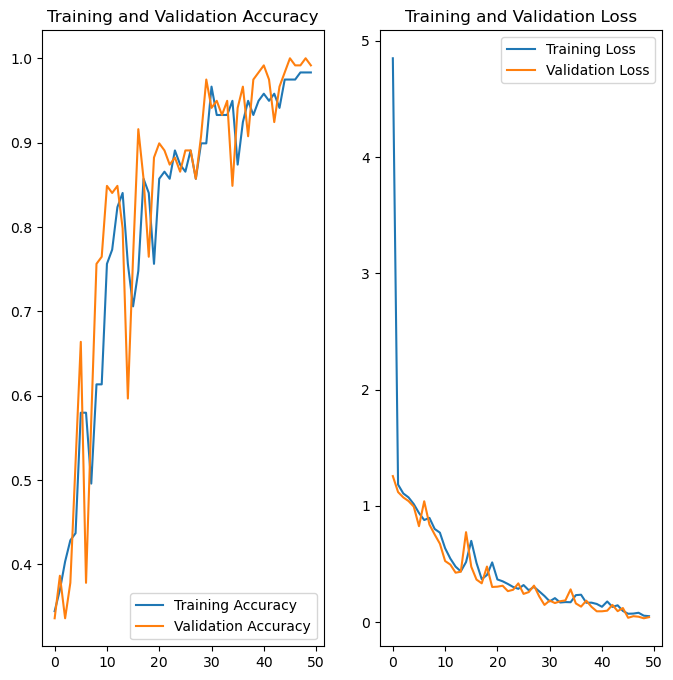

In [339]:
# Ensure the x-axis range matches the available data
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

<div style="text-align: center; background-color: #f0f8ff; color: #004080; padding: 20px; border-radius: 10px;">
    
# Step 10: Make Predictions – Use the trained model to predict classes for new or test images.
🧠📷➡️🔢 = (model + image + output prediction)
</div>

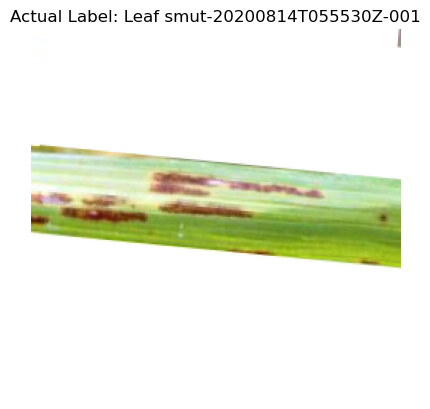

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
Actual Label: Leaf smut-20200814T055530Z-001
Predicted Label: Leaf smut-20200814T055530Z-001


In [344]:
# Get class names from the generator
import numpy as np
class_names = list(test_generator.class_indices.keys())

# Get a single batch from the test generator
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]  # Extract first image from batch
    first_label = int(label_batch[0])  # Extract first label from batch

    # Display the image
    plt.imshow(first_image)
    plt.axis('off')  # Remove axes
    plt.title(f"Actual Label: {class_names[first_label]}")
    plt.show()

    # Predict the class
    batch_prediction = model.predict(image_batch)  # Get predictions
    predicted_label = np.argmax(batch_prediction[0])  # Get index of max probability

    print(f"Actual Label: {class_names[first_label]}")
    print(f"Predicted Label: {class_names[predicted_label]}")

    break  # Stop after processing the first batch


### Write a function for inference

In [348]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


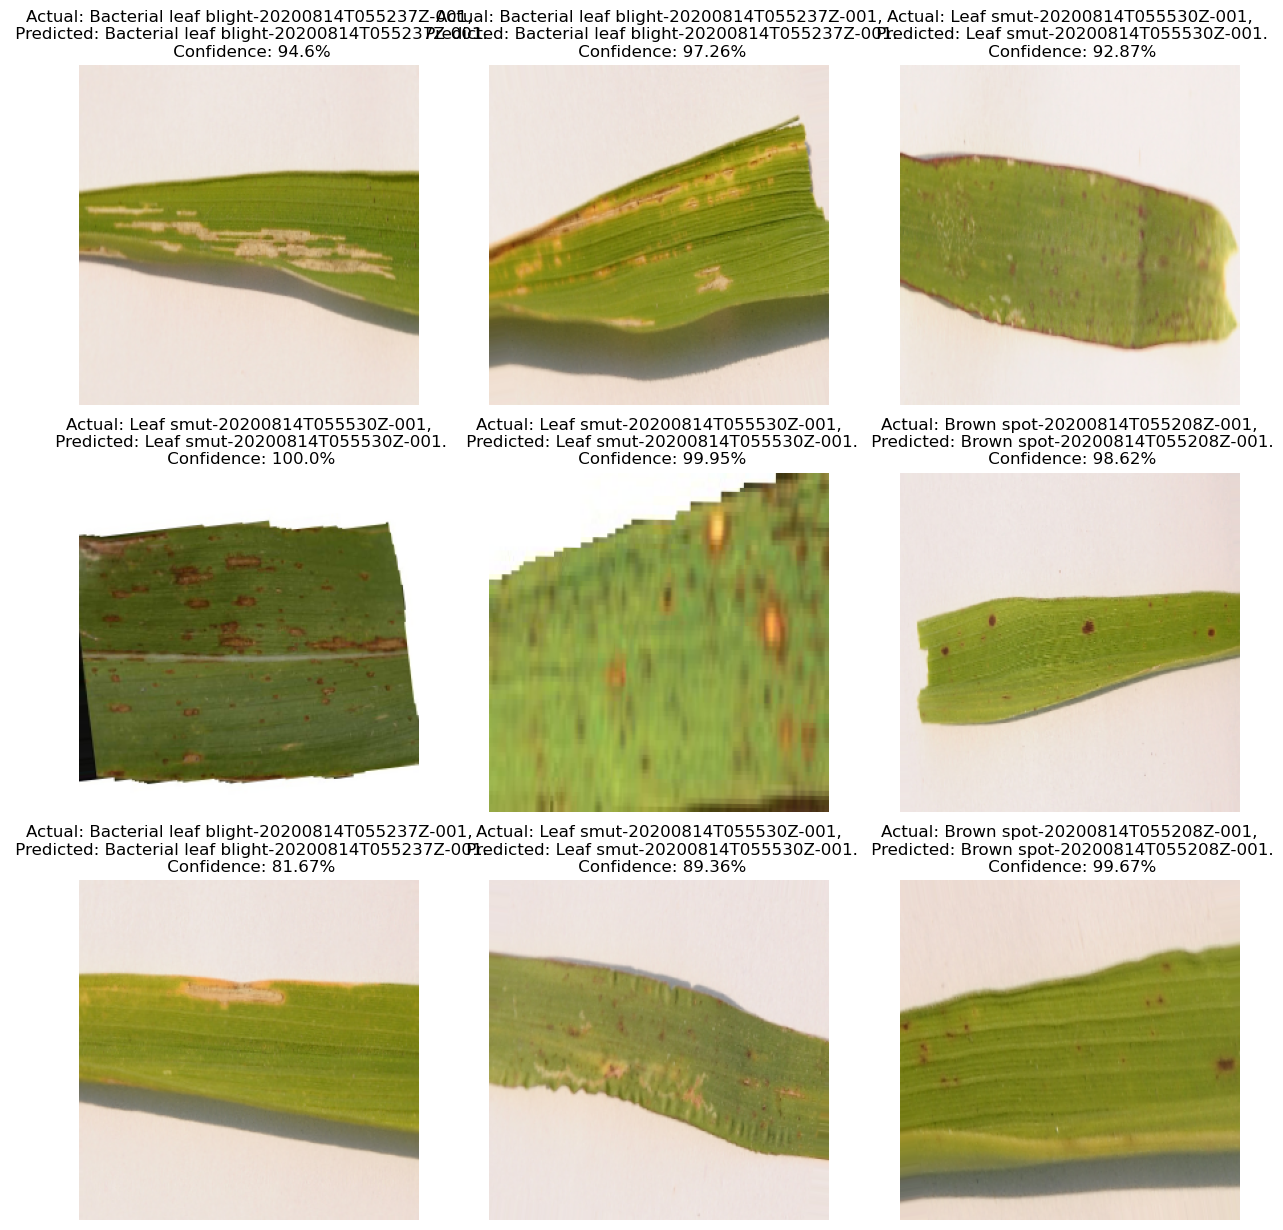

In [352]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

<div style="text-align: center; background-color: #fffacd; color: #004080; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif; font-size: 16px;">
  <strong>🔹 Conclusion</strong><br><br>
    The model demonstrates high accuracy in classifying different leaf diseases, with confidence levels mostly above <strong>98.52%</strong>  and a test accuracy of <strong>99.16%</strong>.  It correctly identifies bacterial leaf blight, brown spot, and leaf smut with near-perfect precision. This suggests the model is reliable for disease classification, though further validation on a larger dataset is recommended for real-world deployment.
 This high level of accuracy with minimal loss indicates strong generalization and reliability in image classification tasks.
</div>



import tensorflow as tf

# Load the existing model
model = tf.keras.models.load_model("../PRCP-1001-RiceLeaf.h5")


In [ ]:
# Save model to the same or new file
model.save("../PRCP-1001-RiceLeaf_New.h5")
print("Model saved successfully!")


# THANK YOU